# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First download the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries_of_the_world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [4]:
# Let's see the data types and non-null values for each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [6]:
# This will print basic statistics for numerical columns

df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [7]:
df.duplicated().sum()

0

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part

1 - There are some null values in the data                                   <br>
2 - Some columns doesn't seem to have the appropriate datatype               <br>
3 - The numerical values has ',' not '.' so it would make some problems      <br>

In [8]:
#make a copy for the original dataset

df_copy = df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution on the data
- test the solution to make sure that you have solved the issue

**First issue**

In [9]:
#solution 
# filling with the most frequent value in each column

df = df.fillna(df.mode().iloc[0])

In [10]:
#test 

df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Second and third issues**

In [11]:
#solution 
#looping over the dataframe from the third column to the last column

for column in df.columns[2:]:
    df[column] = df[column].astype(str).str.replace(',','.')
    df[column] = pd.to_numeric(df[column])


In [12]:
#test 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [13]:
from sklearn.preprocessing import OrdinalEncoder,MinMaxScaler

In [14]:
#Ordinal encoding for the first two features

columns = ['Country','Region']
encoder = OrdinalEncoder()
df_encoded = df[['Country','Region']]
df = df.drop(['Country','Region'],axis=1)
df_encoded = encoder.fit_transform(df_encoded)
df_encoded = pd.DataFrame(df_encoded,columns=columns)
df = pd.concat([df,df_encoded],axis=1)

In [15]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,0.0,0.0
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1.0,3.0
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,2.0,6.0
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.010,0.110,0.684,3.0,8.0
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.010,0.110,0.684,4.0,10.0


In [16]:
#MinMax scaling the data

columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=columns)

In [17]:
df.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country,Region
0,0.023631,0.037920,0.002950,0.000000,1.000000,0.851138,0.003663,0.223301,0.002897,0.195299,0.004341,0.814759,0.000000,0.904926,0.657559,0.494148,0.248307,0.356502,0.000000,0.0
1,0.002720,0.001683,0.007658,0.001447,0.364586,0.101800,0.073260,0.836165,0.068573,0.339559,0.087214,0.617369,0.666667,0.180018,0.106740,0.301691,0.189616,0.579596,0.004425,0.3
2,0.025056,0.139485,0.000848,0.000046,0.467650,0.151985,0.100733,0.635922,0.075237,0.051844,0.004933,0.947953,0.000000,0.226750,0.084517,0.131339,0.654628,0.264574,0.008850,0.6
3,0.000039,0.000012,0.017847,0.066949,0.006356,0.036951,0.137363,0.963592,0.250435,0.161005,0.295975,0.625019,0.333333,0.349217,0.035701,0.013004,0.101580,0.697309,0.013274,0.8
4,0.000049,0.000027,0.009348,0.000000,0.626334,0.009317,0.338828,1.000000,0.480008,0.035743,0.000000,0.966702,0.666667,0.032689,0.144262,0.013004,0.101580,0.697309,0.017699,1.0


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

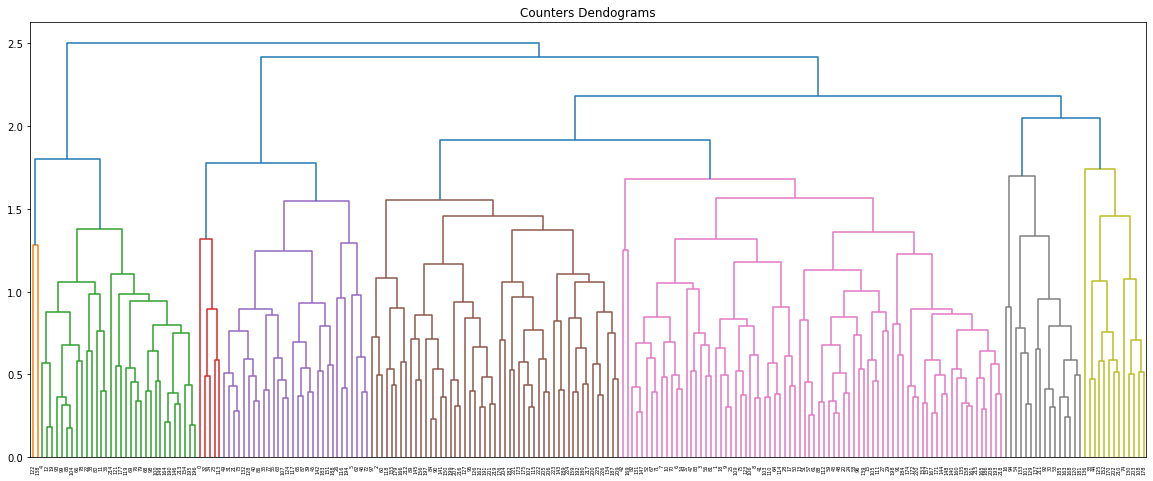

In [18]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 8))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df ,method='complete', metric='euclidean'),orientation='top',leaf_rotation=90)

#fill y with your dataframe
#and method with linkage criteria
#and metric with distance function

In [19]:
#training

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=3)
predictions = clustering.fit_predict(df)

In [20]:
predictions

array([0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0,
       0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0,
       2, 2, 0, 0, 0, 1, 1], dtype=int64)

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [21]:
#Trying PCA on the dataframe

pc_num = 2
from sklearn.decomposition import PCA
pca = PCA(n_components=pc_num)
columns = [f'Principle Component {i+1}' for i in range(pc_num)]
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca,columns=columns)

In [22]:
df_pca.head()

,Principle Component 1,Principle Component 2
0,1.089134,0.467325
1,-0.147774,0.366369
2,0.231251,0.028009
3,-0.193194,-0.134610
4,-0.512950,-0.603968


In [23]:
clustering = AgglomerativeClustering(n_clusters=3)
predictions = clustering.fit_predict(df)

<AxesSubplot:xlabel='Principle Component 1', ylabel='Principle Component 2'>

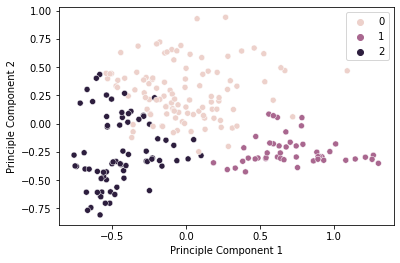

In [24]:
import seaborn as sns

sns.scatterplot(x=df_pca.iloc[:,0],y=df_pca.iloc[:,1],hue=predictions)